##Linear Classification

##Load and Inspect Data

Dataset from the [website](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#). Here are the information provided by the website.

Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)



In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt

--2023-10-05 18:38:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data_banknote_authentication.txt’

data_banknote_authe     [ <=>                ]  45.31K  --.-KB/s    in 0.1s    

2023-10-05 18:38:24 (451 KB/s) - ‘data_banknote_authentication.txt’ saved [46400]



###Load and Inspect Data

In [2]:
import pandas as pd
data = pd.read_csv('data_banknote_authentication.txt', sep = ',', header=None,
                   names=["Variance", "Skewness", "Curtosis", "Entropy", "Class"])
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
print(data.shape[0])

1372


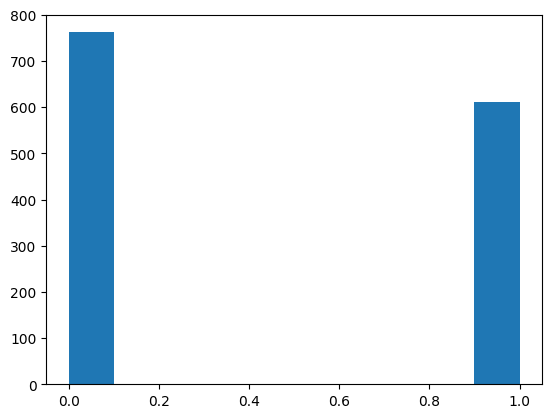

In [4]:
import matplotlib.pyplot as plt
plt.hist(data['Class'])
plt.show()

##Data Preparation

Split the dataset into training and testing data. Split the dataset into training (80%) and testing data (20%).


In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

features = ["Variance", "Skewness", "Curtosis", "Entropy"]
X = data.loc[:, features]
y = data.loc[:, 'Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)
#np.random.choice give it array of indices of pandas data frame

In [6]:
y_train

1326    1
1109    1
1139    1
657     0
704     0
       ..
763     1
835     1
1216    1
559     0
684     0
Name: Class, Length: 1097, dtype: int64

In [7]:
np.array(X_train)

array([[-1.2943  ,  2.6735  , -0.84085 , -2.0323  ],
       [-0.40857 ,  3.0977  , -2.9607  , -2.6892  ],
       [-1.5228  , -6.4789  ,  5.7568  ,  0.87325 ],
       ...,
       [ 0.6005  ,  0.99945 , -2.2126  ,  0.097399],
       [ 2.0165  , -0.25246 ,  5.1707  ,  1.0763  ],
       [-2.0759  , 10.8223  ,  2.6439  , -4.837   ]])

In [8]:
print('Train Size: ', X_train.shape[0])
print('Test Size: ', X_test.shape[0])

Train Size:  1097
Test Size:  275


##Pocket Algorithm


The problem is that we have non linearly separable data. There are two different ways data can be linearly non separable. Either there are outliers which disobey model, or the data is intrinsically nonlinear. The pocket algorithm deals with the former case. Instead of testing combinatorially, (every possible combo, this becomes too much). So we need this trick to overcome that hurdle. Below I append the perceptron algorithm.  

In [9]:
def step_func(a):
    return 1.0 if (a > 0) else 0.0
def pocket (X_train, y_train, lr, epochs):
    m, n = X_train.shape
    theta = np.zeros((n+1,1))
    best_error = m
    best_weights = theta
    for e in range(epochs):
        miss = 0
        for idx, x_i in enumerate(X_train):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, theta))
            if (np.squeeze(y_hat) - y_train[idx]) != 0:
                theta += lr*((y_train[idx] - y_hat)*x_i)
                miss += 1
        if miss < best_error:
            best_error = miss
            best_weights = theta
    return best_weights, best_error


In [10]:
pocket(np.array(X_train), np.array(y_train), .5, 10)

(array([[ 28.       ],
        [-30.03691  ],
        [-19.5049265],
        [-25.5652153],
        [ -6.923369 ]]),
 17)

### Intialize with zero vector

theta = np.zeros((n+1,1) creates the zero vector.

In [11]:
def pocket (X_train, y_train, lr, epochs):
    m, n = X_train.shape
    theta = np.zeros((n+1,1))
    best_error = m
    best_weights = theta
    for e in range(epochs):
        miss = 0
        for idx, x_i in enumerate(X_train):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, theta))
            if (np.squeeze(y_hat) - y_train[idx]) != 0:
                theta += lr*((y_train[idx] - y_hat)*x_i)
                miss += 1
        if miss < best_error:
            best_error = miss
            best_weights = theta
    return best_weights, best_error

#### Training


Turning training data into array to avoid error.

In [12]:
#put your code here
pocket(np.array(X_train), np.array(y_train), .5, 10)

(array([[ 28.       ],
        [-30.03691  ],
        [-19.5049265],
        [-25.5652153],
        [ -6.923369 ]]),
 17)

pocket returns best_weights and best_error.

#### Testing


You can update the code above to run pocket on test data. No need for epochs.

In [35]:
#put your code here
def pocket (X_test, y_test, lr):
    m, n = X_test.shape
    theta = np.zeros((n+1,1))
    best_error = m
    best_weights = theta
    miss = 0
    for idx, x_i in enumerate(X_test):
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)
        y_hat = step_func(np.dot(x_i.T, theta))
        if (np.squeeze(y_hat) - y_test[idx]) != 0:
            theta += lr*((y_test[idx] - y_hat)*x_i)
            miss += 1
    if miss < best_error:
        best_error = miss
        best_weights = theta
    return best_weights, best_error

In [36]:
pocket(np.array(X_test), np.array(y_test), .5)

(array([[  6.5      ],
        [-13.4645485],
        [ -6.41792  ],
        [ -7.647825 ],
        [ -3.01591  ]]),
 35)

### Intialize with linear regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, y)
p_pred = model.predict_proba(X)
y_pred = model.predict(X)
score_ = model.score(X, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [16]:
print(p_pred)

[[1.00000000e+00 1.31034477e-13]
 [1.00000000e+00 1.47441453e-15]
 [9.99999739e-01 2.60757477e-07]
 ...
 [1.62115282e-01 8.37884718e-01]
 [1.42005421e-02 9.85799458e-01]
 [2.20959487e-05 9.99977904e-01]]


In [17]:
print(score_)

0.9883381924198251


In [18]:
print(conf_m)

[[752  10]
 [  6 604]]


In [19]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       762
           1       0.98      0.99      0.99       610

    accuracy                           0.99      1372
   macro avg       0.99      0.99      0.99      1372
weighted avg       0.99      0.99      0.99      1372



In [20]:
def pocket (X_train, y_train, lr, epochs):
    m, n = X_train.shape
    theta = np.zeros((n+1,1))
    best_error = m
    best_weights = theta
    for e in range(epochs):
        miss = 0
        for idx, x_i in enumerate(X_train):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, theta))
            if (np.squeeze(y_hat) - y_train[idx]) != 0:
                theta += lr*((y_train[idx] - y_hat)*x_i)
                miss += 1
        if miss < best_error:
            best_error = miss
            best_weights = theta
    return best_weights, best_error

#### Training


In [22]:
#put your code here
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.863860194034898

#### Testing


In [23]:
#put your code here
reg = LinearRegression().fit(X_test, y_test)
reg.score(X_test, y_test)

0.8699181392720424

##Error Measurement

In [30]:
def step_func(a):
    return 1.0 if (a > 0) else 0.0
def pocket(X_train, y_train, lr, epochs):
    m, n = X_train.shape
    theta = np.zeros((n+1, 1))
    best_error = m
    best_weights = theta
    errors = []  # To store error for each epoch

    for e in range(epochs):
        miss = 0
        for idx, x_i in enumerate(X_train):
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
            y_hat = step_func(np.dot(x_i.T, theta))
            if (np.squeeze(y_hat) - y_train[idx]) != 0:
                theta += lr * ((y_train[idx] - y_hat) * x_i)
                miss += 1
        if miss < best_error:
            best_error = miss
            best_weights = theta
        errors.append(miss)

    return best_weights, errors


In [31]:
best_weights, errors = pocket(np.array(X_train), np.array(y_train), .5, 10)


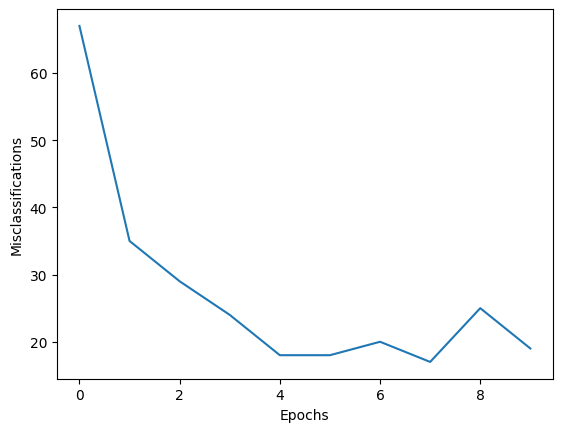

In [32]:
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Misclassifications")
plt.show()

## Conclusion

We began with PLA--creating a step function that would convert an input into a 1 or 0 depending on whether it is greater than or less than 0; then defining a function that takes four arguments: the data, the target, the learning rate and the number of epochs; I then defined local variables. Using X_train.shape I defined m as the number of rows and n as the number of features. I then added a column of zeroes, theta. I defined best_error as the worst possible error, that is, I made it equal to the full number of rows in the data set. Best_weights I made equal to the column of zeros, theta. I then initialized a for loop which introduced the variable miss, set to 0, to be updated over the course of the epochs. I then nested another for loop which ran over the index, inserting another column and y_hat, invoking the step function which takes as an input the dot product of x_i and theta and assigns it to y_hat. If the difference between y_hat and y_train isn't zero then we add to theta the learning rate times the difference of y train and y hat. That counts as a missclassified label so we add 1 to miss. This is where the pocket algorithm kicks in. The if statement that creates the pocket is in the outer for loop. It dictates that if miss is less than our current best error, then we update best error to be equal to miss. We also update best weights to be equal to theta. This will allow us to grab the lowest error over the course of the epochs.

Understanding how to change perceptron to get the pocket algorithm took longer than I expected, and I recognize that I have not been able to fully complete other sections of the homework as I have run into some errors that I have not been able to resolve. I'll be reaching out to discuss how best to proceed with the class, given that my lack of experience with linear algebra is proving challenging. Looking forward to getting your advice.

Here are some of the online resources I used



https://builtin.com/data-science/train-test-split
https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7
https://www.codeproject.com/Articles/1229772/Machine-Learning-Basics-Pocket-Learning-Algorithm
https://home.work.caltech.edu/library/032.html
https://stats.stackexchange.com/questions/51200/pocket-algorithm-for-training-perceptrons
https://realpython.com/logistic-regression-python/


